In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

features = iris.data
classes = iris.target

features.shape

(150, 4)

In [2]:
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
classes.shape

(150,)

In [4]:
classes[:5]

array([0, 0, 0, 0, 0])

In [5]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_classes, test_classes = train_test_split(
    features, classes, test_size=0.2, random_state=100)

train_features.shape

(120, 4)

In [6]:
train_features[:5]

array([[5.5, 2.4, 3.7, 1. ],
       [5.7, 2.8, 4.1, 1.3],
       [6. , 2.2, 5. , 1.5],
       [4.8, 3. , 1.4, 0.1],
       [5.4, 3.9, 1.3, 0.4]])

In [7]:
train_classes.shape

(120,)

In [8]:
train_classes[:5]

array([1, 1, 2, 0, 0])

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3)

dt_classifier.fit(train_features, train_classes)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
predicted_classes = dt_classifier.predict(test_features)

predicted_classes[:5]

array([2, 0, 2, 0, 2])

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(test_classes, predicted_classes)

0.9666666666666667

In [12]:
# get probabilities

predicted_probabilities = dt_classifier.predict_proba(test_features)

predicted_probabilities [:5]

array([[0.        , 0.02941176, 0.97058824],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02941176, 0.97058824],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02941176, 0.97058824]])

/usr/local/lib/python3.5/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


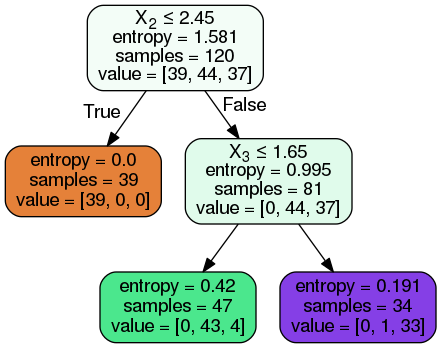

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dt_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())